In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#hide
populations = {
    # Taken from US Census Bureau NST-EST2019-01: Table 1. Annual Estimates of the Resident Population 
    # for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019
    # https://www.census.gov/newsroom/press-kits/2019/national-state-estimates.html
    "AL": 4903185,
    "AK": 731545,
    "AZ": 7278717,
    "AR": 3017804,
    "CA": 39512223,
    "CO": 5758736,
    "CT": 3565287,
    "DE": 973764,
    "DC": 705749,
    "FL": 21477737,
    "GA": 10617423,
    "HI": 1415872,
    "ID": 1787065,
    "IL": 12671821,
    "IN": 6732219,
    "IA": 3155070,
    "KS": 2913314,
    "KY": 4467673,
    "LA": 4648794,
    "ME": 1344212,
    "MD": 6045680,
    "MA": 6892503,
    "MI": 9986857,
    "MN": 5639632,
    "MS": 2976149,
    "MO": 6137428,
    "MT": 1068778,
    "NE": 1934408,
    "NV": 3080156,
    "NH": 1359711,
    "NJ": 8882190,
    "NM": 2096829,
    "NY": 19453561,
    "NC": 10488084,
    "ND": 762062,
    "OH": 11689100,
    "OK": 3956971,
    "OR": 4217737,
    "PA": 12801989,
    "RI": 1059361,
    "SC": 5148714,
    "SD": 884659,
    "TN": 6829174,
    "TX": 28995881,
    "UT": 3205958,
    "VT": 623989,
    "VA": 8535519,
    "WA": 7614893,
    "WV": 1792147,
    "WI": 5822434,
    "WY": 578759,
    "PR": 3193694,
    "GU": 165_718,
    "VI": 104_914,
    "AS": 55_641,
    "MP": 55_194,
}

In [ ]:
#hide
%matplotlib inline
import math
import requests
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.disable_max_rows()
from IPython.display import HTML
import matplotlib.pyplot as plt

CHART_WIDTH = 600
CHART_HEIGHT = 450
NUM_COLUMNS = 2

states_url = "https://covidtracking.com/api/v1/states/daily.json"
us_url = "https://covidtracking.com/api/v1/us/daily.json"
case_threshold = 100

r = requests.get(states_url)
states_df = pd.DataFrame(r.json())
states_df['date'] = pd.to_datetime(states_df.date, format="%Y%m%d")
states_df = states_df[['date', 'state', 'positive', 'death']].sort_values('date')
cols = {}

# Fix Hawaii
# https://www.hawaiinewsnow.com/2020/03/24/state-officials-report-first-coronavirus-related-death-hawaii/
states_df.loc[(states_df.date == '2020-03-24') & (states_df.state == 'HI'), 'death'] = 0
states_df.loc[(states_df.date == '2020-03-25') & (states_df.state == 'HI'), 'death'] = 0

for state in states_df.state.unique():
    cases = states_df[(states_df.state == state) & (states_df.positive > case_threshold)]
    cases = cases.reset_index().positive.reset_index(drop=True)
    if len(cases) > 1:
        cols[state] = cases
        
r = requests.get(us_url)
us_df = pd.DataFrame(r.json())
us_df['date'] = pd.to_datetime(us_df.date, format="%Y%m%d")
us_df = us_df[['date', 'positive', 'death']].sort_values('date')
us_df['state'] = 'US'
cols['US'] = us_df.positive.reset_index(drop=True)

us_df['state'] = 'US'
states_df = states_df.append(us_df, ignore_index=True)

states_df['population'] = states_df['state'].map(populations)
states_df['deaths_per_m'] = states_df.death / (states_df.population / 1_000_000)
states_df['cases_per_m'] = states_df.positive / (states_df.population / 1_000_000)
states_df.head()

,date,state,positive,death,population,deaths_per_m,cases_per_m
0,2020-01-22,WA,0.0,NaN,7614893.0,NaN,0.0
1,2020-01-22,MA,NaN,NaN,6892503.0,NaN,NaN
2,2020-01-23,MA,NaN,NaN,6892503.0,NaN,NaN
3,2020-01-23,WA,0.0,NaN,7614893.0,NaN,0.0
4,2020-01-24,MA,NaN,NaN,6892503.0,NaN,NaN


In [ ]:
states_df.to_csv('/gdrive/My Drive/JeffMorgan-COVID19SurveyFB/stateDate_casesDeaths.csv', index=None)

In [ ]:
cp /gdrive/My\ Drive/JeffMorgan-COVID19SurveyFB/*.csv /content/

In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
library(readr)
overall_state_smoothed <- read_csv("/content/overall-state-smoothed.csv")
head(overall_state_smoothed)


R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = ""),
  state_code = col_character(),
  gender = col_character(),
  age_bucket = col_character()
)

R[write to console]: See spec(...) for full column specifications.



# A tibble: 6 x 103
  date       state_code gender age_bucket summed_n smoothed_pct_cli
  <date>     <chr>      <chr>  <chr>         <dbl>            <dbl>
1 2020-08-25 ak         female 18-34           104            0    
2 2020-08-24 ak         female 18-34           113            0.929
3 2020-08-23 ak         female 18-34           121            0.868
4 2020-08-22 ak         female 18-34           125            0.84 
5 2020-08-21 ak         female 18-34           112            0.938
6 2020-08-20 ak         female 18-34           121            0.868
# … with 97 more variables: smoothed_pct_ili <dbl>,
#   smoothed_pct_cli_anosmia_ageusia <dbl>, smoothed_pct_hh_cli <dbl>,
#   smoothed_pct_cmnty_cli <dbl>, smoothed_pct_hh_fever <dbl>,
#   smoothed_pct_hh_sore_throat <dbl>, smoothed_pct_hh_cough <dbl>,
#   smoothed_pct_hh_shortness_of_breath <dbl>,
#   smoothed_pct_hh_difficulty_breathing <dbl>, smoothed_mean_hh_cli_ct <dbl>,
#   smoothed_mean_cmnty_cli_ct <dbl>, smoothed_pct_self_

In [ ]:
%%R 
install.packages("dplyr")
install.packages("xts")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 935654 bytes (913 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




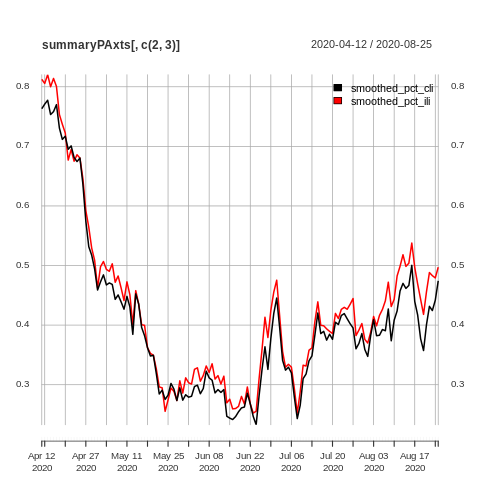

In [ ]:
%%R
library(dplyr)
summary1 <- overall_state_smoothed %>% filter(date==max(date)) %>% filter(state_code=='pa')
summary2 <- overall_state_smoothed %>% filter(age_bucket %in% 'overall') %>% filter(state_code=='pa') %>% filter(gender %in% 'overall') %>% arrange(date)
summaryPA <- summary2[,-c(2,3,4)]
summaryPAxts <- xts::as.xts(summaryPA[,-c(1)], order.by=summaryPA$date)
plot(summaryPAxts[,c(2,3)], legend.loc = "topright")

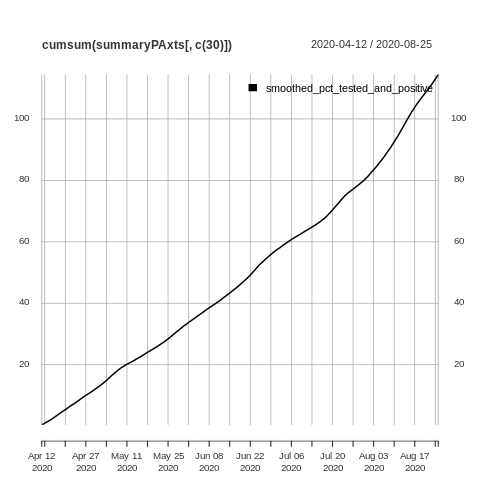

In [ ]:
%%R
plot(summaryPAxts[,c(7:11)], legend.loc = "topright", title="Household")


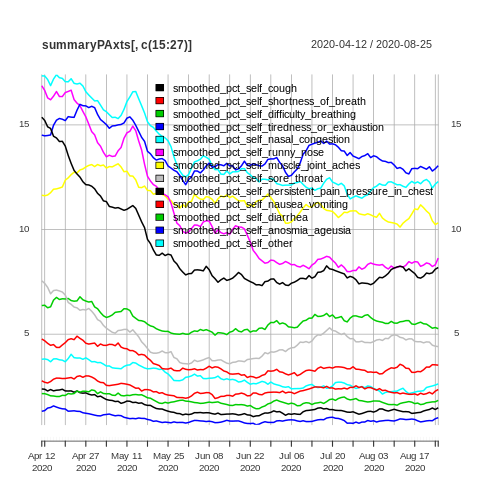

In [ ]:
%%R

plot(summaryPAxts[,c(15:27)], legend.loc = "topright", title="Self")

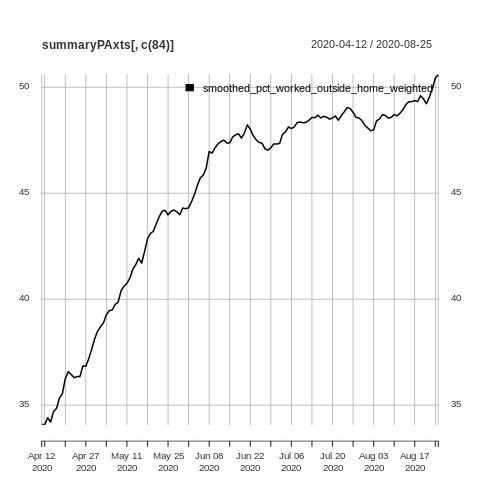

In [ ]:
%%R
plot(summaryPAxts[,c(84)], legend.loc = "topright")

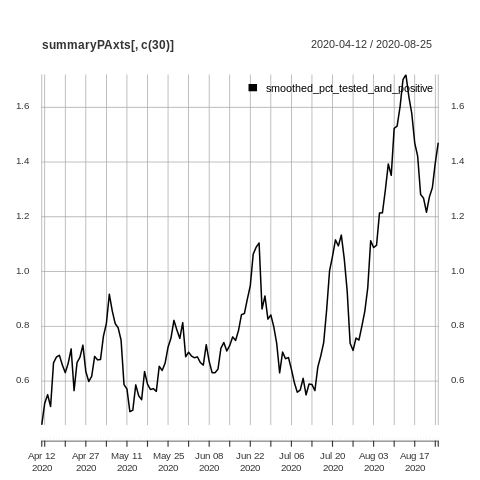

In [ ]:
%%R
plot(summaryPAxts[,c(30)], legend.loc = "topright")

In [ ]:
states_df['state'] = states_df['state'].str.lower()
surveyData = pd.read_csv('/content/overall-state-smoothed.csv')
surveyData['date'] = pd.to_datetime(surveyData['date'])
surveyData.head()

,date,state_code,gender,age_bucket,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,smoothed_pct_hh_fever,smoothed_pct_hh_sore_throat,smoothed_pct_hh_cough,smoothed_pct_hh_shortness_of_breath,smoothed_pct_hh_difficulty_breathing,smoothed_mean_hh_cli_ct,smoothed_mean_cmnty_cli_ct,smoothed_pct_self_fever,smoothed_pct_self_cough,smoothed_pct_self_shortness_of_breath,smoothed_pct_self_difficulty_breathing,smoothed_pct_self_tiredness_or_exhaustion,smoothed_pct_self_nasal_congestion,smoothed_pct_self_runny_nose,smoothed_pct_self_muscle_joint_aches,smoothed_pct_self_sore_throat,smoothed_pct_self_persistent_pain_pressure_in_chest,smoothed_pct_self_nausea_vomiting,smoothed_pct_self_diarrhea,smoothed_pct_self_anosmia_ageusia,smoothed_pct_self_other,smoothed_pct_self_none_of_above,smoothed_pct_self_multiple_symptoms,smoothed_pct_tested_and_positive,smoothed_pct_tested_and_negative,smoothed_pct_tested_no_result,smoothed_pct_could_not_get_tested,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,...,smoothed_pct_hh_difficulty_breathing_weighted,smoothed_mean_hh_cli_ct_weighted,smoothed_mean_cmnty_cli_ct_weighted,smoothed_pct_self_fever_weighted,smoothed_pct_self_cough_weighted,smoothed_pct_self_shortness_of_breath_weighted,smoothed_pct_self_difficulty_breathing_weighted,smoothed_pct_self_tiredness_or_exhaustion_weighted,smoothed_pct_self_nasal_congestion_weighted,smoothed_pct_self_runny_nose_weighted,smoothed_pct_self_muscle_joint_aches_weighted,smoothed_pct_self_sore_throat_weighted,smoothed_pct_self_persistent_pain_pressure_in_chest_weighted,smoothed_pct_self_nausea_vomiting_weighted,smoothed_pct_self_diarrhea_weighted,smoothed_pct_self_anosmia_ageusia_weighted,smoothed_pct_self_other_weighted,smoothed_pct_self_none_of_above_weighted,smoothed_pct_self_multiple_symptoms_weighted,smoothed_pct_tested_and_positive_weighted,smoothed_pct_tested_and_negative_weighted,smoothed_pct_tested_no_result_weighted,smoothed_pct_could_not_get_tested_weighted,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,2020-08-25,ak,female,18-34,104,0.0000,0.0000,1.0150,0.0000,20.1923,0.0000,10.5769,12.5000,4.8077,1.9231,0.0783,0.4038,0.0000,11.1657,1.0490,1.049,24.6880,13.8634,11.9403,12.9019,11.0128,2.9720,6.0497,12.0933,1.0150,2.0433,56.3350,24.0385,0.0000,32.9441,0.0000,5.4945,61.5614,65.3846,42.3077,...,2.0830,0.0771,0.3764,0.0000,10.9681,0.9367,0.9367,24.1001,13.9623,12.5788,13.5799,10.4352,3.5005,5.9532,11.2723,1.1462,2.0245,54.7773,23.7172,0.0000,13.6172,0.0000,1.6507,27.1128,65.2744,42.6198,4.2526,5.3342,6.5835,0.8103,2.7720,0.0,2.9533,6.7597,16.0658,0.0000,0.0000,5.0479,71.3434,4.2617
1,2020-08-24,ak,female,18-34,113,0.9292,0.9292,1.8633,0.8850,20.4867,0.8850,13.2743,15.0442,5.3097,1.7699,0.1074,3.1323,0.9292,12.0624,0.9292,0.000,26.3299,13.6160,13.7045,12.7311,10.9562,2.6991,7.4263,11.0939,0.9341,2.8097,52.4877,24.7788,0.0000,23.2406,1.6895,5.0569,70.0130,63.7168,41.5929,...,2.0968,0.1027,2.8766,0.8520,11.2922,1.0419,0.0000,25.2174,13.5757,14.0903,12.8218,10.1072,2.7255,7.3729,10.5542,1.0549,2.9051,52.2407,23.8232,0.0000,10.8083,0.8520,1.5192,32.2703,63.8330,41.3405,4.3004,5.2654,6.1008,0.7457,2.5512,0.0,2.7181,7.9151,16.5434,0.8520,0.

In [ ]:
states_df2 = surveyData.merge(states_df, right_on=['date', 'state'], left_on=['date', 'state_code'], )
states_df2 = states_df2.drop('state', axis=1)
states_df2 = states_df2[states_df2['age_bucket']=='overall']
states_df2 = states_df2[states_df2['gender']=='overall']

states_df2 = states_df2.drop(['positive', 'death',	'population', 'gender', 'age_bucket'], axis=1)

states_df2['state_code']  = states_df2['state_code'].astype('category')
states_df2.head()

,date,state_code,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,smoothed_pct_hh_fever,smoothed_pct_hh_sore_throat,smoothed_pct_hh_cough,smoothed_pct_hh_shortness_of_breath,smoothed_pct_hh_difficulty_breathing,smoothed_mean_hh_cli_ct,smoothed_mean_cmnty_cli_ct,smoothed_pct_self_fever,smoothed_pct_self_cough,smoothed_pct_self_shortness_of_breath,smoothed_pct_self_difficulty_breathing,smoothed_pct_self_tiredness_or_exhaustion,smoothed_pct_self_nasal_congestion,smoothed_pct_self_runny_nose,smoothed_pct_self_muscle_joint_aches,smoothed_pct_self_sore_throat,smoothed_pct_self_persistent_pain_pressure_in_chest,smoothed_pct_self_nausea_vomiting,smoothed_pct_self_diarrhea,smoothed_pct_self_anosmia_ageusia,smoothed_pct_self_other,smoothed_pct_self_none_of_above,smoothed_pct_self_multiple_symptoms,smoothed_pct_tested_and_positive,smoothed_pct_tested_and_negative,smoothed_pct_tested_no_result,smoothed_pct_could_not_get_tested,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,smoothed_mean_outside_hh_contact_at_work_ct,smoothed_mean_outside_hh_contact_shopping_ct,...,smoothed_mean_cmnty_cli_ct_weighted,smoothed_pct_self_fever_weighted,smoothed_pct_self_cough_weighted,smoothed_pct_self_shortness_of_breath_weighted,smoothed_pct_self_difficulty_breathing_weighted,smoothed_pct_self_tiredness_or_exhaustion_weighted,smoothed_pct_self_nasal_congestion_weighted,smoothed_pct_self_runny_nose_weighted,smoothed_pct_self_muscle_joint_aches_weighted,smoothed_pct_self_sore_throat_weighted,smoothed_pct_self_persistent_pain_pressure_in_chest_weighted,smoothed_pct_self_nausea_vomiting_weighted,smoothed_pct_self_diarrhea_weighted,smoothed_pct_self_anosmia_ageusia_weighted,smoothed_pct_self_other_weighted,smoothed_pct_self_none_of_above_weighted,smoothed_pct_self_multiple_symptoms_weighted,smoothed_pct_tested_and_positive_weighted,smoothed_pct_tested_and_negative_weighted,smoothed_pct_tested_no_result_weighted,smoothed_pct_could_not_get_tested_weighted,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted,deaths_per_m,cases_per_m
11,2020-08-25,ak,755,0.4033,0.4033,1.4767,0.5312,15.2781,0.5312,6.7646,10.8609,3.3205,2.1241,0.1300,2.8151,0.4033,9.0013,2.4185,1.3453,13.3008,10.8764,10.0888,11.5501,5.5198,1.8752,2.8262,5.4932,1.2092,2.5628,67.1955,19.2053,1.2905,24.7990,2.5560,2.0651,69.2894,53.1126,44.9007,14.7832,9.6971,...,2.0932,0.6627,8.8691,2.6847,1.7249,13.0392,9.5832,9.6852,11.1075,4.7196,2.0881,2.9707,5.6484,1.2692,2.1363,67.2146,18.3250,0.4373,7.6927,0.9059,0.9182,21.2132,57.5859,42.1935,16.7122,8.4916,4.5075,1.5331,8.7178,5.8245,5.8221,25.0797,15.6944,3.4092,2.3089,6.6449,53.4575,17.9670,49.210917,7745.251488
23,2020-08-24,ak,808,0.5013,0.5013,1.5042,0.7467,15.2037,0.7467,6.8263,11.3861,3.4815,2.3617,0.1113,3.2210,0.5013,9.4045,2.2547,1.3789,13.1681,10.9066,10.1694,11.1515,5.5257,1.8753,2.7627,5.5060,1.1286,2.6460,66.8650,18.5644,1.2058,25.1479,2.3499,1.9297,69.3668,53.4653,44.6782,14.6769,10.0981,...,2.4225,0.6693,8.9025,2.4464,1.6427,12.8668,9.8606,10.1163,10.8863,4.6379,1.9304,3.0396,5.8807,1.1312,2.2432,66.7001,17.8619,0.4086,7.9166,0.8663,0.8579,21.7897,57.6393,42.3034,16.1421,8.6305,4.3985,1.1882,8.9944,5.9895,5.6269,25.4439,15.29

In [ ]:
# states_df2.state_code.value_counts()
# states_df2.info()
states_df2.to_csv('/gdrive/My Drive/JeffMorgan-COVID19SurveyFB/allAgesBothGenders_412-825_MERGED.csv')

# Cross-sectional model of today's deaths based on today's survey data

# Cross-sectional model of 7-days-future deaths based on today's survey data